<a href="https://colab.research.google.com/github/kashikazi/LinearRegression/blob/master/LR_HousingPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
!git clone https://github.com/kashikazi/LinearRegression.git


fatal: destination path 'LinearRegression' already exists and is not an empty directory.


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [100]:
#Git Hub data should be public to read here
url = 'https://raw.githubusercontent.com/kashikazi/LinearRegression/master/housing_train.csv'
df_housing_train = pd.read_csv(url)
df_housing_train.head(5)


Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [101]:
df_housing_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [102]:
#df_housing_train.info(int64, float)

In [103]:
k1 = df_housing_train.describe()
k2 = k1.transpose()

In [104]:
print(k1)

                Id   MSSubClass  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean    730.500000    56.897260  ...  2007.815753  180921.195890
std     421.610009    42.300571  ...     1.328095   79442.502883
min       1.000000    20.000000  ...  2006.000000   34900.000000
25%     365.750000    20.000000  ...  2007.000000  129975.000000
50%     730.500000    50.000000  ...  2008.000000  163000.000000
75%    1095.250000    70.000000  ...  2009.000000  214000.000000
max    1460.000000   190.000000  ...  2010.000000  755000.000000

[8 rows x 38 columns]


In [120]:
k2

count           mean  ...        75%       max
Id             1460.0     730.500000  ...    1095.25    1460.0
MSSubClass     1460.0      56.897260  ...      70.00     190.0
LotFrontage    1201.0      70.049958  ...      80.00     313.0
LotArea        1460.0   10516.828082  ...   11601.50  215245.0
OverallQual    1460.0       6.099315  ...       7.00      10.0
OverallCond    1460.0       5.575342  ...       6.00       9.0
YearBuilt      1460.0    1971.267808  ...    2000.00    2010.0
YearRemodAdd   1460.0    1984.865753  ...    2004.00    2010.0
MasVnrArea     1452.0     103.685262  ...     166.00    1600.0
BsmtFinSF1     1460.0     443.639726  ...     712.25    5644.0
BsmtFinSF2     1460.0      46.549315  ...       0.00    1474.0
BsmtUnfSF      1460.0     567.240411  ...     808.00    2336.0
TotalBsmtSF    1460.0    1057.429452  ...    1298.25    6110.0
1stFlrSF       1460.0    1162.626712  ...    1391.25    4692.0
2ndFlrSF       1460.0     346.992466  ...     728.00    2065.0
LowQualFinSF   1460.0       5.844521  ...       0.00     572.0
GrLivArea      1460.0    1515.463699  ...    1776.75    5642.0
BsmtFullBath   1460.0       0.425342  ...       1.00       3.0
BsmtHalfBath   1460.0       0.057534  ...       0.00       2.0
FullBath       1460.0       1.565068  ...       2.00       3.0
HalfBath       1460.0       0.382877  ...       1.00       2.0
BedroomAbvGr   1460.0       2.866438  ...       3.00       8.0
KitchenAbvGr   1460.0       1.046575  ...       1.00       3.0
TotRmsAbvGrd   1460.0       6.517808  ...       7.00      14.0
Fireplaces     1460.0       0.613014  ...       1.00       3.0
GarageYrBlt    1379.0    1978.506164  ...    2002.00    2010.0
GarageCars     1460.0       1.767123  ...       2.00       4.0
GarageArea     1460.0     472.980137  ...     576.00    1418.0
WoodDeckSF     1460.0      94.244521  ...     168.00     857.0
OpenPorchSF    1460.0      46.660274  ...      68.00     547.0
EnclosedPorch  1460.0      21.954110  ...       0.00     552.0
3SsnPorch      1460.0       3.409589  ...       0.00     508.0
ScreenPorch    1460.0      15.060959  ...       0.00     480.0
PoolArea       1460.0       2.758904  ...       0.00     738.0
MiscVal        1460.0      43.489041  ...       0.00   15500.0
MoSold         1460.0       6.321918  ...       8.00      12.0
YrSold         1460.0    2007.815753  ...    2009.00    2010.0
SalePrice      1460.0  180921.195890  ...  214000.00  755000.0

[38 rows x 8 columns]

In [105]:
df_housing_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

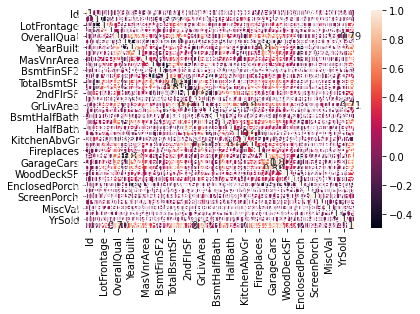

In [106]:
sns.heatmap(df_housing_train.corr(), annot=True)

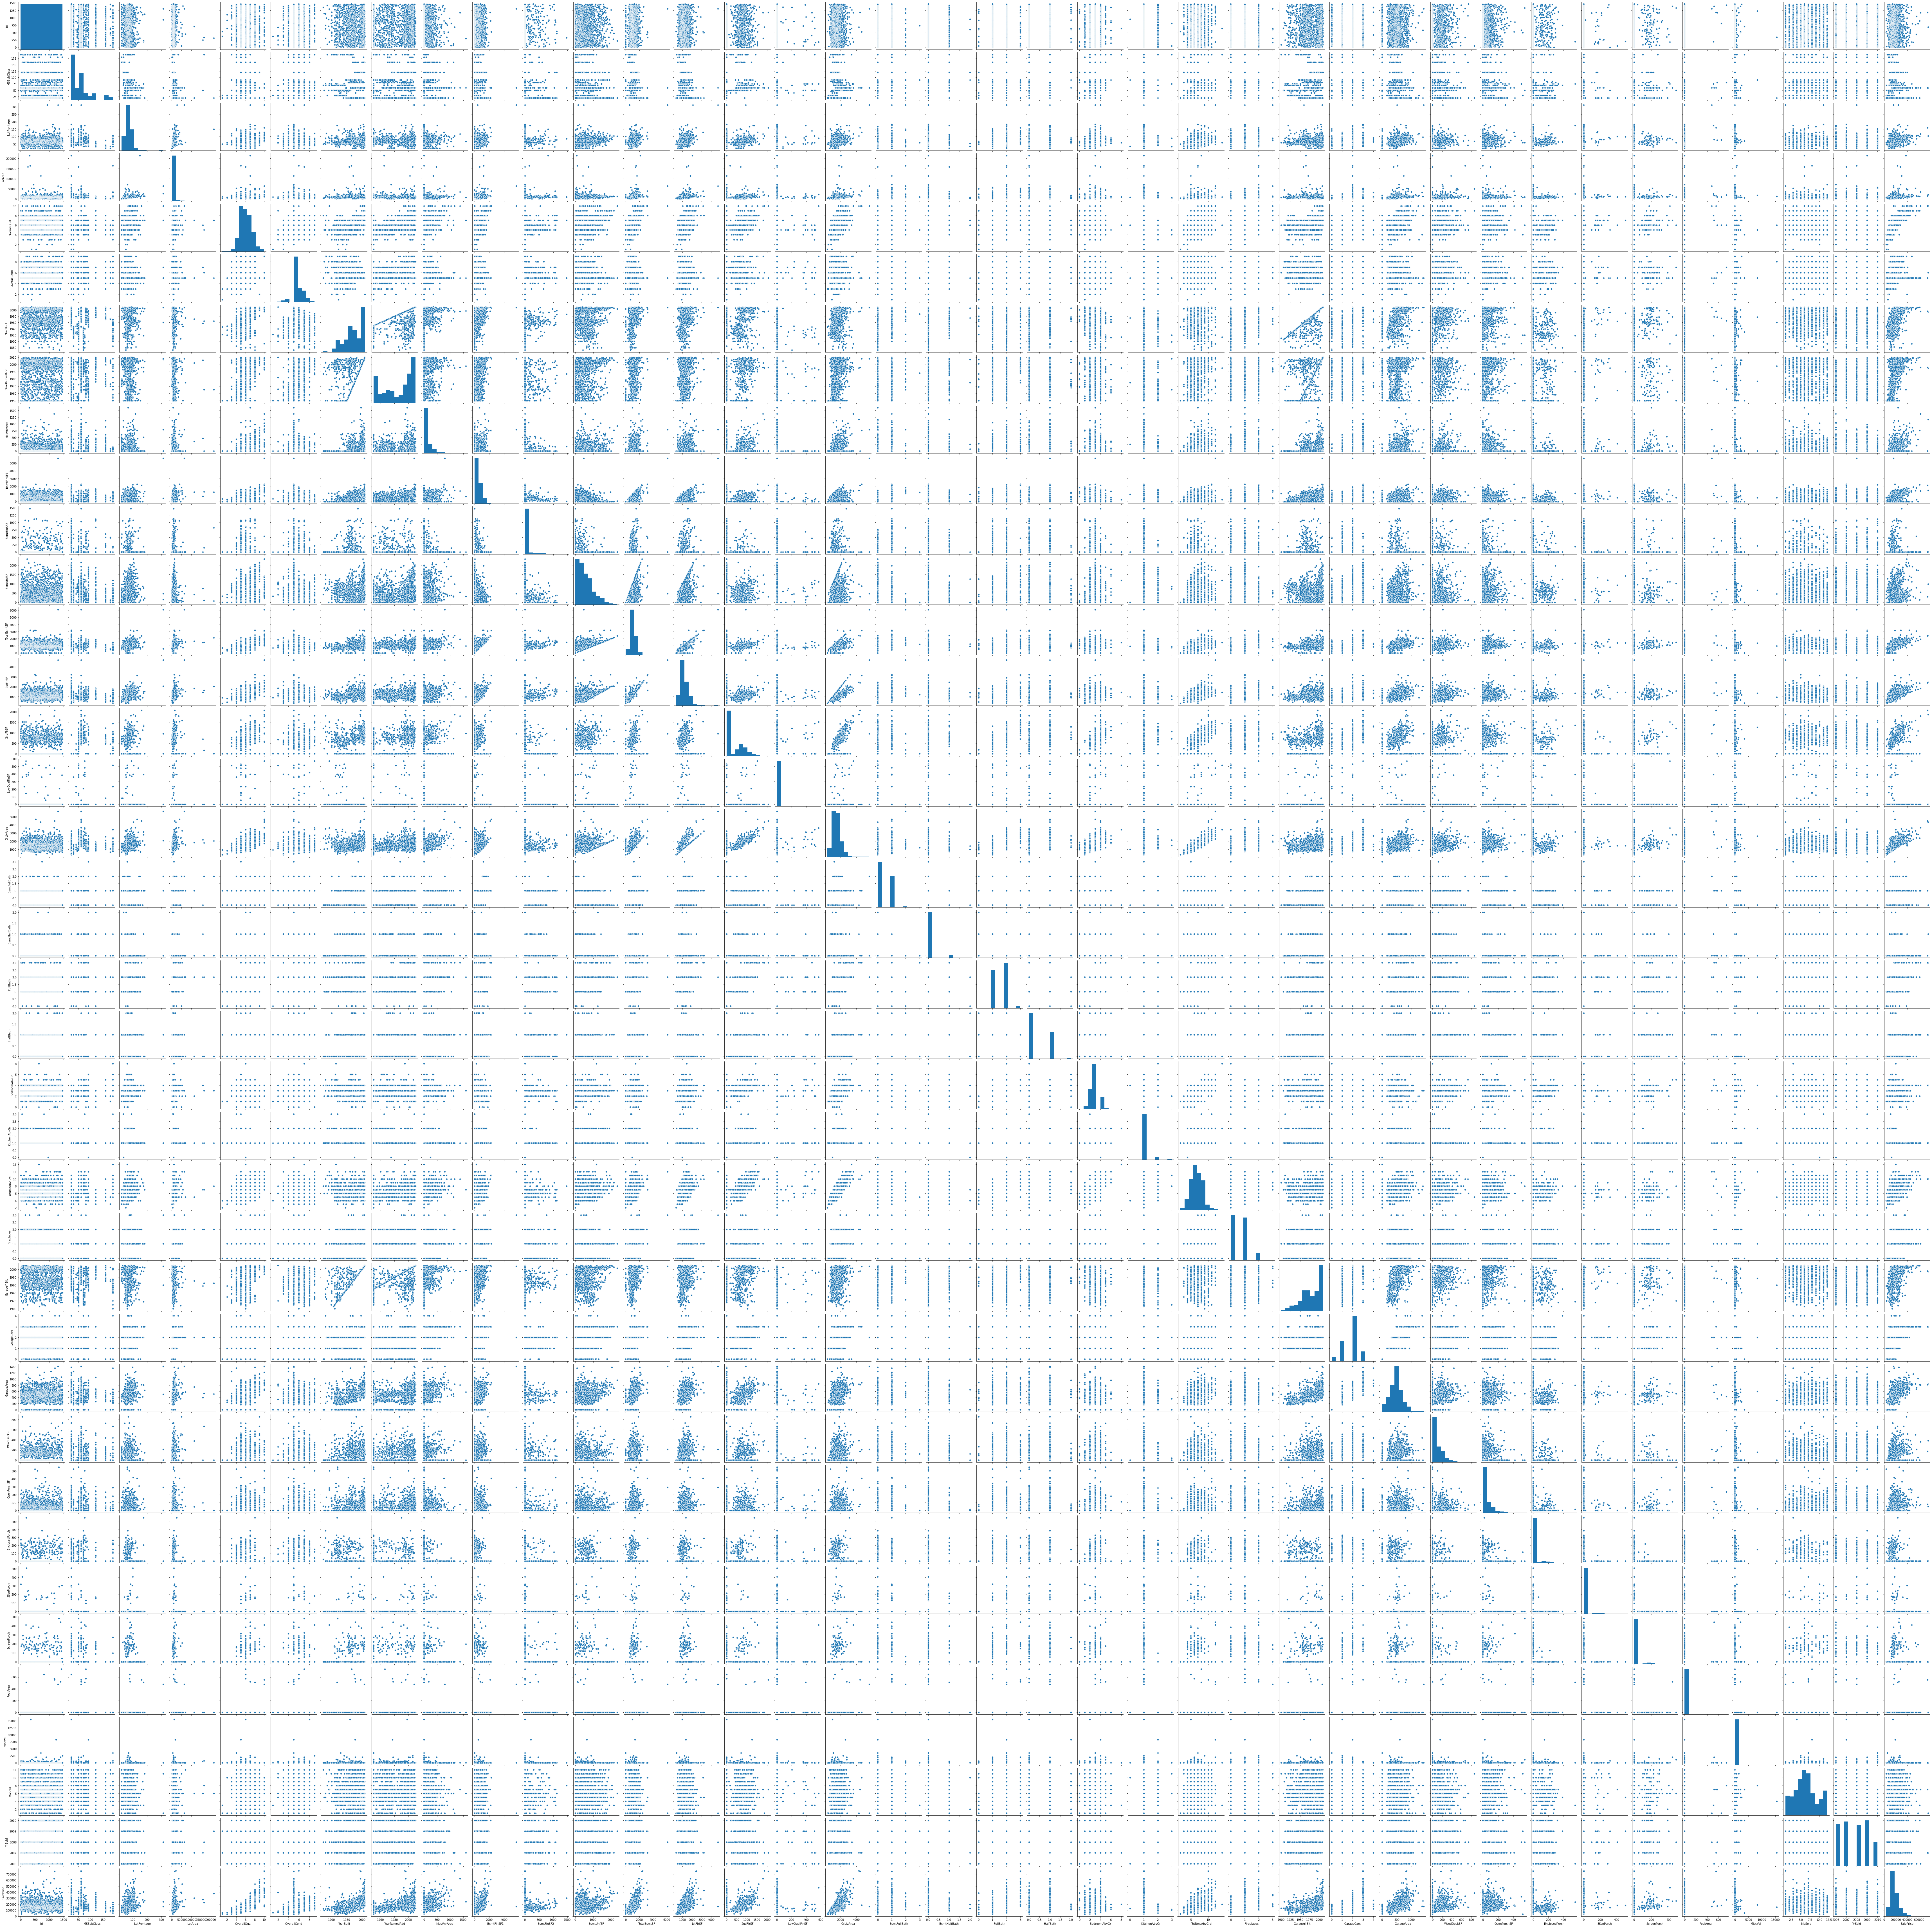

In [107]:
#data plot clustering data using seaborn library
sns.pairplot(df_housing_train)

In [137]:
url = 'https://raw.githubusercontent.com/kashikazi/LinearRegression/master/housing_test.csv'
df_housing_test = pd.read_csv(url)
df_housing_test.head(5)

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]

In [143]:
x_train = df_housing_train[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','YrSold']]
y_train = df_housing_train['SalePrice']
x_test = df_housing_test[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','YrSold']]
#y_test = df_housing_test['SalePrice']

In [139]:
df_housing_train = df_housing_train.dropna()
df_housing_test = df_housing_test.dropna()

In [138]:
x_train = np.array('x_train')
y_train = np.array('y_train')
x_test = np.array('x_test')
y_test = np.array('y_test')

In [140]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [145]:
clf = LinearRegression(normalize=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(r2_score(y_test, y_pred))


ValueError: ignored

In [111]:
#splitting the data in to train and test data
from sklearn.model_selection import train_test_split
#x_train = df_housing_train('x')

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=101)
x_train

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
878    879          85       RL  ...        WD         Normal    148000
1448  1449          50       RL  ...        WD         Normal    112000
241    242          30       RM  ...        WD         Normal    110500
331    332          20       RL  ...        WD         Normal    139000
700    701          20       RL  ...        WD         Normal    312500
...    ...         ...      ...  ...       ...            ...       ...
1417  1418          60       RL  ...        WD         Normal    340000
75      76         180       RM  ...        WD         Normal     91000
599    600         160       RM  ...       COD         Normal    151000
1361  1362          20       RL  ...        WD         Normal    260000
863    864          20       RL  ...        WD         Normal    132500

[876 rows x 81 columns]

In [127]:
y_test

Series([], Name: YrSold, dtype: int64)

In [126]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

AttributeError: ignored

In [122]:
lm =LinearRegression()

In [123]:
lm.fit(x_train, y_train)

ValueError: ignored

In [114]:
url = 'https://raw.githubusercontent.com/kashikazi/LinearRegression/master/housing_test.csv'
df_housing_test = pd.read_csv(url)
df_housing_test.head(5)

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]

In [115]:
t1 = df_housing_test.describe()
t1

Id   MSSubClass  ...       MoSold       YrSold
count  1459.000000  1459.000000  ...  1459.000000  1459.000000
mean   2190.000000    57.378341  ...     6.104181  2007.769705
std     421.321334    42.746880  ...     2.722432     1.301740
min    1461.000000    20.000000  ...     1.000000  2006.000000
25%    1825.500000    20.000000  ...     4.000000  2007.000000
50%    2190.000000    50.000000  ...     6.000000  2008.000000
75%    2554.500000    70.000000  ...     8.000000  2009.000000
max    2919.000000   190.000000  ...    12.000000  2010.000000

[8 rows x 37 columns]

In [116]:
t2 = t1.transpose()
t2

count         mean          std  ...     50%       75%      max
Id             1459.0  2190.000000   421.321334  ...  2190.0   2554.50   2919.0
MSSubClass     1459.0    57.378341    42.746880  ...    50.0     70.00    190.0
LotFrontage    1232.0    68.580357    22.376841  ...    67.0     80.00    200.0
LotArea        1459.0  9819.161069  4955.517327  ...  9399.0  11517.50  56600.0
OverallQual    1459.0     6.078821     1.436812  ...     6.0      7.00     10.0
OverallCond    1459.0     5.553804     1.113740  ...     5.0      6.00      9.0
YearBuilt      1459.0  1971.357779    30.390071  ...  1973.0   2001.00   2010.0
YearRemodAdd   1459.0  1983.662783    21.130467  ...  1992.0   2004.00   2010.0
MasVnrArea     1444.0   100.709141   177.625900  ...     0.0    164.00   1290.0
BsmtFinSF1     1458.0   439.203704   455.268042  ...   350.5    753.50   4010.0
BsmtFinSF2     1458.0    52.619342   176.753926  ...     0.0      0.00   1526.0
BsmtUnfSF      1458.0   554.294925   437.260486  ...   460.0    797.75   2140.0
TotalBsmtSF    1458.0  1046.117970   442.898624  ...   988.0   1305.00   5095.0
1stFlrSF       1459.0  1156.534613   398.165820  ...  1079.0   1382.50   5095.0
2ndFlrSF       1459.0   325.967786   420.610226  ...     0.0    676.00   1862.0
LowQualFinSF   1459.0     3.543523    44.043251  ...     0.0      0.00   1064.0
GrLivArea      1459.0  1486.045922   485.566099  ...  1432.0   1721.00   5095.0
BsmtFullBath   1457.0     0.434454     0.530648  ...     0.0      1.00      3.0
BsmtHalfBath   1457.0     0.065202     0.252468  ...     0.0      0.00      2.0
FullBath       1459.0     1.570939     0.555190  ...     2.0      2.00      4.0
HalfBath       1459.0     0.377656     0.503017  ...     0.0      1.00      2.0
BedroomAbvGr   1459.0     2.854010     0.829788  ...     3.0      3.00      6.0
KitchenAbvGr   1459.0     1.042495     0.208472  ...     1.0      1.00      2.0
TotRmsAbvGrd   1459.0     6.385195     1.508895  ...     6.0      7.00     15.0
Fireplaces     1459.0     0.581220     0.647420  ...     0.0      1.00      4.0
GarageYrBlt    1381.0  1977.721217    26.431175  ...  1979.0   2002.00   2207.0
GarageCars     1458.0     1.766118     0.775945  ...     2.0      2.00      5.0
GarageArea     1458.0   472.768861   217.048611  ...   480.0    576.00   1488.0
WoodDeckSF     1459.0    93.174777   127.744882  ...     0.0    168.00   1424.0
OpenPorchSF    1459.0    48.313914    68.883364  ...    28.0     72.00    742.0
EnclosedPorch  1459.0    24.243317    67.227765  ...     0.0      0.00   1012.0
3SsnPorch      1459.0     1.794380    20.207842  ...     0.0      0.00    360.0
ScreenPorch    1459.0    17.064428    56.609763  ...     0.0      0.00    576.0
PoolArea       1459.0     1.744345    30.491646  ...     0.0      0.00    800.0
MiscVal        1459.0    58.167923   630.806978  ...     0.0      0.00  17000.0
MoSold         1459.0     6.104181     2.722432  ...     6.0      8.00     12.0
YrSold         1459.0  2007.769705     1.301740  ...  2008.0   2009.00   2010.0

[37 rows x 8 columns]

In [117]:
df_housing_train = df_housing_train.dropna()
df_housing_test = df_housing_test.dropna()

In [134]:
x_train = df_housing_train[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','YrSold']]
y_train = df_housing_train['SalePrice']


In [135]:
x_test = df_housing_test[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','YrSold']]



In [119]:
x_